## Compare the performance of the scikit and the custom random forest regressors

Tested on the scikit Diabetes toy dataset.

## Import of the dataset

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

data = load_diabetes()
x = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = y.iloc[:,0]

print(x.head())
print(y[:5])


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: 0, dtype: float64


## Split the dataset into training and testing sets

In [2]:
#split the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Comparison of the performance of the forest regressors
### 1) Compare on predefined parameters

In [9]:
from sklearn.ensemble import RandomForestRegressor
from random_forest import CustomRandomForestRegressor
from sklearn.metrics import r2_score

print("Forest Regressor Comparison for overfit parameters")
print("------------------------------------------------------")

scikit_model = RandomForestRegressor(n_estimators=50, max_depth=40, random_state=42)
# Calculate average accuracy for scikit-learn forest as it changes with every fit
scikit_model.fit(x_train, y_train)
scikit_score = scikit_model.score(x_test, y_test)
print("Scikit-learn forest  |   Scikit-learn tree")
print("--------------------------------------------------")
print("Test data R2:                              ", "{:.2f}".format(scikit_score))
# Train data accuracy should be the same for every fit
scikit_train_score = scikit_model.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(scikit_train_score))
print("--------------------------------------------------")

custom_model_scikit_tree = CustomRandomForestRegressor(n_estimators=50, max_depth=40, tree_type="scikit")
custom_model_scikit_tree.fit(x_train, y_train)
custom_score_scikit_tree = custom_model_scikit_tree.score(x_test, y_test)
print("Custom forest        |   Scikit-learn tree")
print("--------------------------------------------------")
print("Test data R2:                              ", "{:.2f}".format(custom_score_scikit_tree))
custom_train_score_scikit_tree = custom_model_scikit_tree.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(custom_train_score_scikit_tree))
print("--------------------------------------------------")

custom_model_custom_tree = CustomRandomForestRegressor(n_estimators=50, max_depth=40, tree_type="custom")
custom_model_custom_tree.fit(x_train, y_train)
custom_score_custom_tree = custom_model_custom_tree.score(x_test, y_test)
print("Custom forest        |   Custom tree")
print("--------------------------------------------------")
print("Test data R2:                              ", "{:.2f}".format(custom_score_custom_tree))
custom_train_score_custom_tree = custom_model_custom_tree.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(custom_train_score_custom_tree))
print("---------------------------------------------------")


Forest Regressor Comparison for overfit parameters
------------------------------------------------------
Scikit-learn forest  |   Scikit-learn tree
--------------------------------------------------
Test data R2:                               0.43
Train data R2                               0.92
--------------------------------------------------
Custom forest        |   Scikit-learn tree
--------------------------------------------------
Test data R2:                               0.40
Train data R2                               0.92
--------------------------------------------------
Custom forest        |   Custom tree
--------------------------------------------------
Test data R2:                               0.44
Train data R2                               0.92
---------------------------------------------------


In [16]:
print("Forest Regressor Comparison for random parameters")
print("------------------------------------------------------")
print("max_depth=3, min_samples_split=4, min_samples_leaf=5, n_estimators=6")
print("------------------------------------------------------")

scikit_model = RandomForestRegressor(n_estimators=6, max_depth=3, min_samples_split=4, min_samples_leaf=5, random_state=42, max_features='sqrt')
scikit_model.fit(x_train, y_train)
scikit_score = scikit_model.score(x_test, y_test)
print("Scikit-learn forest  |   Scikit-learn tree")
print("------------------------------------------------------")
print("Average test data R2:                      ", "{:.2f}".format(scikit_score))
scikit_train_score = scikit_model.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(scikit_train_score))
print("------------------------------------------------------")

custom_model_scikit_tree = CustomRandomForestRegressor(n_estimators=6, max_depth=3, min_samples_split=4, min_samples_leaf=5, tree_type="scikit", max_features='sqrt')
custom_model_scikit_tree.fit(x_train, y_train)
custom_score_scikit_tree = custom_model_scikit_tree.score(x_test, y_test)
print("Custom forest        |   Scikit-learn tree")
print("------------------------------------------------------")
print("Average test data R2:                      ", "{:.2f}".format(custom_score_scikit_tree))
custom_train_score_scikit_tree = custom_model_scikit_tree.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(custom_train_score_scikit_tree))
print("------------------------------------------------------")

custom_model_custom_tree = CustomRandomForestRegressor(n_estimators=6, max_depth=3, min_samples_split=4, min_samples_leaf=5, tree_type="custom", max_features='sqrt')
custom_model_custom_tree.fit(x_train, y_train)
custom_score_custom_tree = custom_model_custom_tree.score(x_test, y_test)
print("Custom forest        |   Custom tree")
print("------------------------------------------------------")
print("Average test data R2:                      ", "{:.2f}".format(custom_score_custom_tree))
custom_train_score_custom_tree = custom_model_custom_tree.score(x_train, y_train)
print("Train data R2                              ", "{:.2f}".format(custom_train_score_custom_tree))
print("------------------------------------------------------")


Forest Regressor Comparison for random parameters
------------------------------------------------------
max_depth=3, min_samples_split=4, min_samples_leaf=5, n_estimators=6
------------------------------------------------------
Scikit-learn forest  |   Scikit-learn tree
------------------------------------------------------
Average test data R2:                       0.41
Train data R2                               0.52
------------------------------------------------------
Custom forest        |   Scikit-learn tree
------------------------------------------------------
Average test data R2:                       0.45
Train data R2                               0.53
------------------------------------------------------
Custom forest        |   Custom tree
------------------------------------------------------
Average test data R2:                       0.41
Train data R2                               0.53
------------------------------------------------------


### 2) Compare on the best parameters obtained by hyperparameter tuning

#### Hyperparameter space

In [17]:
params = dict()
# max depth list from 1 to 20
params['max_depth'] = list(range(1, 31, 2))
params['min_samples_split'] = list(range(2, 53, 10))
params['min_samples_leaf'] = list(range(1, 52, 10))
params['n_estimators'] = [100]
params['n_jobs'] = [-1]
params['max_features'] = ['sqrt'] # D/3 is the best for regression (in our case is the same as sqrt)
print(params)

{'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'min_samples_split': [2, 12, 22, 32, 42, 52], 'min_samples_leaf': [1, 11, 21, 31, 41, 51], 'n_estimators': [100], 'n_jobs': [-1], 'max_features': ['sqrt']}


#### Initialize Optimizer

In [18]:
from fast_parameter_search import RandomForestGridSearchTuning

scikit_clf = RandomForestRegressor()
# add random state to make the results reproducible
scikit_params = params.copy()
scikit_params['random_state'] = [42]
scikit_params['oob_score'] = [True]
scikit_search = RandomForestGridSearchTuning(model=scikit_clf, param_grid=scikit_params, n_jobs=-1)

custom_clf_scikit = CustomRandomForestRegressor()
custom_params_scikit = params.copy()
custom_params_scikit['tree_type'] = ['scikit']
custom_search_scikit = RandomForestGridSearchTuning(custom_clf_scikit, custom_params_scikit, n_jobs=-1)

custom_clf_custom = CustomRandomForestRegressor()
custom_params_custom = params.copy()
custom_params_custom['tree_type'] = ['custom']
custom_search_custom = RandomForestGridSearchTuning(custom_clf_custom, custom_params_custom, n_jobs=-1)

#### Results

In [19]:
#Scikit Learn Forest | Scikit Learn Tree
scikit_search.fit(x_train, y_train)
print("Scikit Learn Forest | Scikit Learn Tree")
print("Best score", scikit_search.best_score)
print("Best parameters", scikit_search.best_params)

# Custom Forest | Scikit Learn Tree
custom_search_scikit.fit(x_train, y_train)
print("Custom Forest | Scikit Learn Tree")
print("Best score", custom_search_scikit.best_score)
print("Best parameters", custom_search_scikit.best_params)

# Custom Forest | Custom Tree
custom_search_custom.fit(x_train, y_train)
print("Custom Forest | Custom Tree")
print("Best score", custom_search_custom.best_score)
print("Best parameters", custom_search_custom.best_params)

Scikit Learn Forest | Scikit Learn Tree
Best score 0.45831608587996864
Best parameters {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_estimators': 100, 'n_jobs': -1, 'max_features': 'sqrt', 'random_state': 42, 'oob_score': True}
Custom Forest | Scikit Learn Tree
Best score 0.45620948994575183
Best parameters {'max_depth': 23, 'min_samples_split': 12, 'min_samples_leaf': 1, 'n_estimators': 100, 'n_jobs': -1, 'max_features': 'sqrt', 'tree_type': 'scikit'}
Custom Forest | Custom Tree
Best score 0.46671398327896507
Best parameters {'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 11, 'n_estimators': 100, 'n_jobs': -1, 'max_features': 'sqrt', 'tree_type': 'custom'}


In [39]:
from sklearn.metrics import accuracy_score

best_scikit_model = scikit_search.best_estimator
best_scikit_model.fit(x_train, y_train)
y_pred_scikit = best_scikit_model.predict(x_test)
scikit_accuracy = r2_score(y_test, y_pred_scikit)

best_custom_scikit_model = custom_search_scikit.best_estimator
best_custom_scikit_model.fit(x_train, y_train)
y_pred_custom_scikit = best_custom_scikit_model.predict(x_test)
custom_scikit_accuracy = r2_score(y_test, y_pred_custom_scikit)

best_custom_custom_model = custom_search_custom.best_estimator
best_custom_custom_model.fit(x_train, y_train)
y_pred_custom_custom = best_custom_custom_model.predict(x_test)
custom_custom_accuracy = r2_score(y_test, y_pred_custom_custom)

print("Tree Classifier Comparison for best parameters")
print("---------------------------------------------------------")
print("Scikit Forest - Scikit Tree R2 on test data:     ", "{:.2f}".format(scikit_accuracy))
print("Custom Forest - Scikit Tree R2 on test data:     ", "{:.2f}".format(custom_scikit_accuracy))
print("Custom Forest - Custom Tree R2 on test data:     ", "{:.2f}".format(custom_custom_accuracy))



Tree Classifier Comparison for best parameters
---------------------------------------------------------
Scikit Forest - Scikit Tree R2 on test data:      0.47
Custom Forest - Scikit Tree R2 on test data:      0.45
Custom Forest - Custom Tree R2 on test data:      0.46


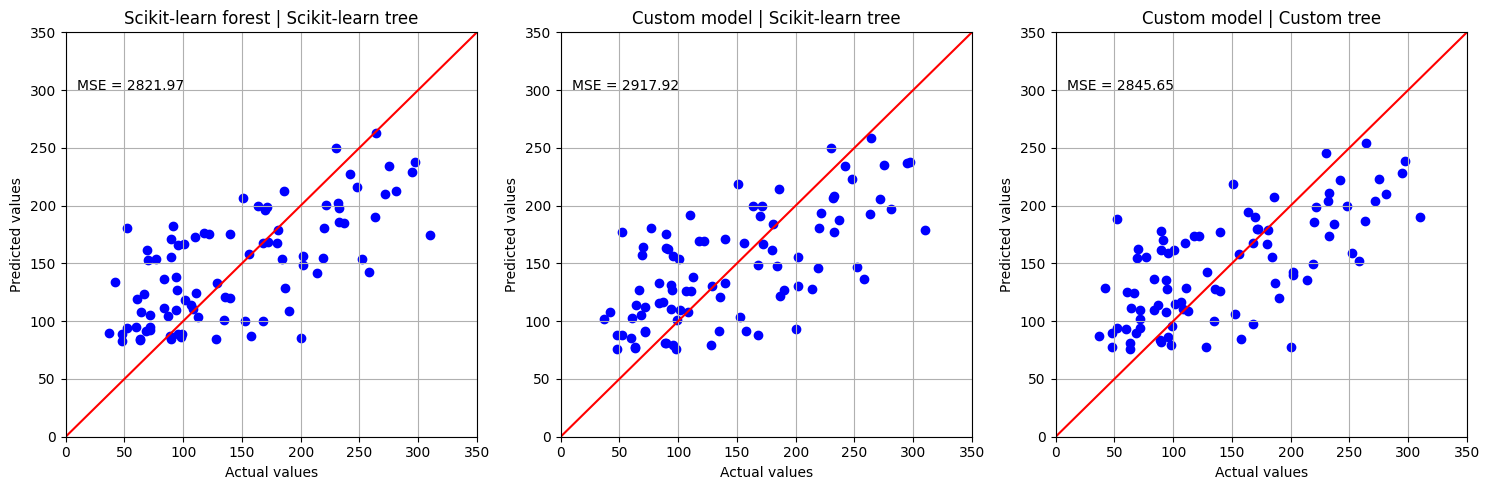

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error  

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_scikit, color='blue')
plt.title('Scikit-learn forest | Scikit-learn tree')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([0, 350], [0, 350], color='red')
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.text(10, 300, 'MSE = ' + str("{:.2f}".format(mean_squared_error(y_test, y_pred_scikit))))
plt.grid()

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_custom_scikit, color='blue')
plt.title('Custom model | Scikit-learn tree')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([0, 350], [0, 350], color='red')
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.text(10, 300, 'MSE = ' + str("{:.2f}".format(mean_squared_error(y_test, y_pred_custom_scikit))))
plt.grid()

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_custom_custom, color='blue')
plt.title('Custom model | Custom tree')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([0, 350], [0, 350], color='red')
plt.xlim(0, 350)
plt.ylim(0, 350)
plt.text(10, 300, 'MSE = ' + str("{:.2f}".format(mean_squared_error(y_test, y_pred_custom_custom))))
plt.grid()

plt.tight_layout()

plt.show()

